In [65]:
import networkx as nx
import random
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def generate(n, r):
    G = nx.Graph()

    for u in range(1, n + 1):
        G.add_node(u)

    # 连接左右节点
    for i in range(1, n + 1):
        G.add_edge(i, i % n + 1)
        G.add_edge(i, (i - 2) % n + 1)

    # 连接长程边
    for u in tqdm(range(1, n + 1), desc='Generating edges'):  # 添加进度条
        prob = []
        for v in range(1, n + 1):
            distance = min((v - u) % n, (u - v) % n)
            if distance==1 or distance==0:
                prob.append(0)
            else:
                prob.append(distance ** (-r))
                
        total_prob = sum(prob)
        prob = [p / total_prob for p in prob]  # 归一化概率分布

        # 长程边的点
        selected_indices = random.choices(range(len(prob)), prob, k=2)
        
        for a in range(2):
            G.add_edge(u, selected_indices[a] + 1)  # 节点编号从 1 开始，因此需要加一

    return G


In [12]:
def generate(n, r):
    G = nx.Graph()

    for u in range(1, n + 1):
        G.add_node(u)

    # 连接左右节点
    for i in range(1, n + 1):
        G.add_edge(i, i % n + 1)
        G.add_edge(i, (i - 2) % n + 1)

    # 连接长程边
    for u in tqdm(range(1, n + 1), desc='Generating edges'):  # 添加进度条
        prob = []
        for v in range(1, n + 1):
            distance = min((v - u) % n, (u - v) % n)
            if distance==1 or distance==0:
                prob.append(0)
            else:
                prob.append(distance ** (-r))
                
        total_prob = sum(prob)
        prob = [p / total_prob for p in prob]  # 归一化概率分布

        # 长程边的点
        selected_indices = random.choices(range(len(prob)), prob, k=3)[2]

        G.add_edge(u, selected_indices+ 1)  # 节点编号从 1 开始，因此需要加一

    return G


In [87]:
def shortest_path(graph, start, end):
    path_length = 0
    current_vertex = start
    n = len(graph)
    visited = set()  # 用于记录已访问的节点
    
    while current_vertex != end:
        neighbors = list(graph.neighbors(current_vertex))

        # 过滤掉已经访问过的邻居节点
        unvisited_neighbors = [neighbor for neighbor in neighbors if neighbor not in visited]
        
        # 计算当前节点到终点的距离
        distances_to_end = {neighbor: min((neighbor - end) % n, (end - neighbor) % n) for neighbor in unvisited_neighbors}

        # 选择离终点最近的未访问过的邻居节点作为下一个节点
        next_vertex = min(distances_to_end, key=distances_to_end.get)
        path_length += 1
        current_vertex = next_vertex
        
        visited.add(current_vertex)
    
    return path_length


def average_shortest_path_length(graph):
    total_shortest_path_length = 0
    total_pairs = 0
    m = len(graph)
    # 遍历所有节点对，但只处理节点对中第一个节点小于第二个节点的情况
    for start_node in tqdm(range(1, m), desc='Average'):
        for end_node in range(start_node + 1, m+1):
            # 计算最短路径长度
            shortest_path_length = shortest_path(graph, start_node, end_node)
            total_shortest_path_length += shortest_path_length
            total_pairs += 1
    
    average_length = total_shortest_path_length / total_pairs
    return average_length


In [91]:
data =[]
for m in np.arange(0,4.0,0.5):
    f = generate(1000,m)
    path = average_shortest_path_length(f)
    print(path)
    data.append(path)

Generating edges:   0%|          | 0/1000 [00:00<?, ?it/s]

Average:   0%|          | 0/999 [00:00<?, ?it/s]

13.890394394394395


Generating edges:   0%|          | 0/1000 [00:00<?, ?it/s]

Average:   0%|          | 0/999 [00:00<?, ?it/s]

10.269777777777778


Generating edges:   0%|          | 0/1000 [00:00<?, ?it/s]

Average:   0%|          | 0/999 [00:00<?, ?it/s]

9.272486486486487


Generating edges:   0%|          | 0/1000 [00:00<?, ?it/s]

Average:   0%|          | 0/999 [00:00<?, ?it/s]

13.172894894894895


Generating edges:   0%|          | 0/1000 [00:00<?, ?it/s]

Average:   0%|          | 0/999 [00:00<?, ?it/s]

26.18304104104104


Generating edges:   0%|          | 0/1000 [00:00<?, ?it/s]

Average:   0%|          | 0/999 [00:00<?, ?it/s]

41.259721721721725


Generating edges:   0%|          | 0/1000 [00:00<?, ?it/s]

Average:   0%|          | 0/999 [00:00<?, ?it/s]

67.96057857857858


Generating edges:   0%|          | 0/1000 [00:00<?, ?it/s]

Average:   0%|          | 0/999 [00:00<?, ?it/s]

87.06034434434434


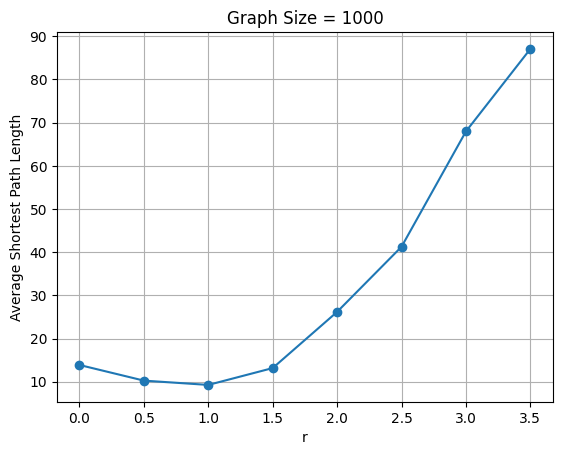

In [92]:
x = np.arange(0, 4.0, 0.5)

# 绘制折线图
plt.plot(x, data,marker='o')
plt.xlabel('r')
plt.ylabel('Average Shortest Path Length')
plt.title('Graph Size = 1000')
plt.grid(True)